### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/bf/f89y356d061dpv04rhvw5mpw0000gn/T/ipykernel_24725/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Import dataset

In [2]:
df = pd.read_csv('csv/Salary_data.csv')

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Visualisation

<Axes: xlabel='YearsExperience', ylabel='Salary'>

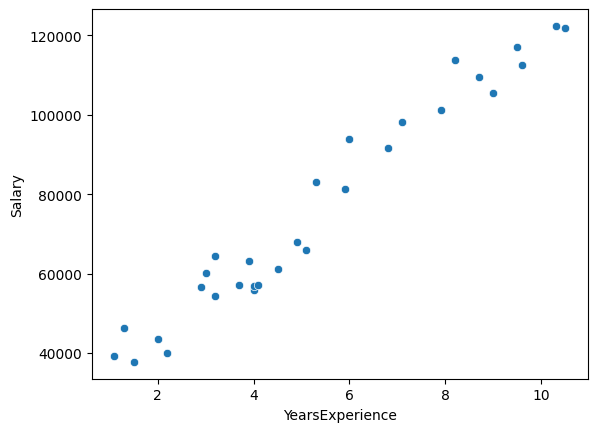

In [4]:
sns.scatterplot(data=df,x='YearsExperience',y='Salary')

<Axes: xlabel='YearsExperience', ylabel='Salary'>

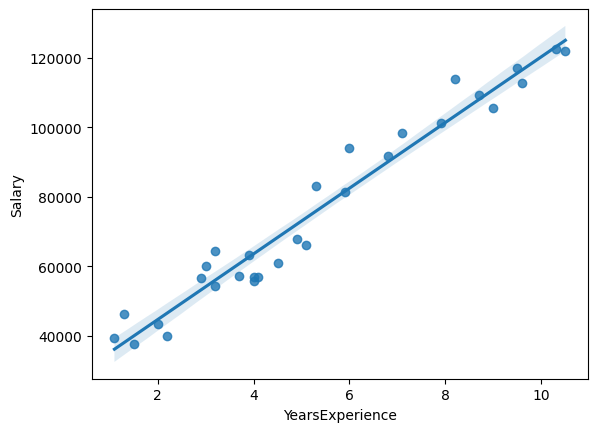

In [5]:
sns.regplot(data=df,x='YearsExperience',y='Salary')

In [6]:
X = df.iloc[:,:1].values
y = df.iloc[:,-1].values

In [7]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [8]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

### Splitting DataSet into train and test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print("Shape of X_train is: {}".format(X_train.shape))
print("Shape of y_train is: {}".format(y_train.shape))
print("Shape of X_test is: {}".format(X_test.shape))
print("Shape of y_test is: {}".format(y_test.shape))

Shape of X_train is: (24, 1)
Shape of y_train is: (24,)
Shape of X_test is: (6, 1)
Shape of y_test is: (6,)


In [12]:
X_test

array([[9.6],
       [4.9],
       [8.2],
       [5.3],
       [3.2],
       [3.7]])

In [13]:
y_test

array([112635.,  67938., 113812.,  83088.,  64445.,  57189.])

In [14]:
X_train

array([[10.3],
       [ 8.7],
       [ 4. ],
       [ 1.1],
       [ 2.2],
       [ 5.1],
       [ 2.9],
       [ 4.1],
       [ 4. ],
       [ 7.9],
       [ 1.3],
       [ 1.5],
       [ 9. ],
       [ 2. ],
       [ 7.1],
       [ 9.5],
       [ 5.9],
       [10.5],
       [ 6.8],
       [ 3.2],
       [ 3.9],
       [ 4.5],
       [ 6. ],
       [ 3. ]])

In [15]:
y_train

array([122391., 109431.,  56957.,  39343.,  39891.,  66029.,  56642.,
        57081.,  55794., 101302.,  46205.,  37731., 105582.,  43525.,
        98273., 116969.,  81363., 121872.,  91738.,  54445.,  63218.,
        61111.,  93940.,  60150.])

## Training simple linear regression on training set

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

## Predicting Test results

In [19]:
y_test_pr = lr.predict(X_test)
y_test

array([112635.,  67938., 113812.,  83088.,  64445.,  57189.])

In [20]:
lr.predict([[7]])# Predicting own values

array([91288.29027299])

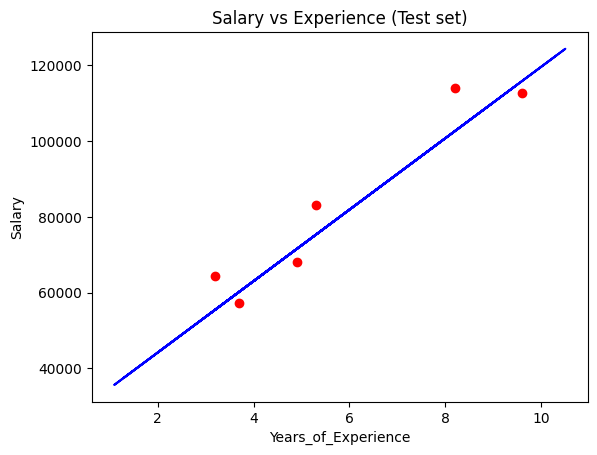

In [21]:
plt.scatter (X_test, y_test, color = 'red')
plt.plot(X_train, lr.predict (X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years_of_Experience')
plt.ylabel('Salary')
plt.show()

In [22]:
lr.coef_

array([9423.81532303])

In [23]:
lr.intercept_

25321.583011776827